In [1]:
#importation des librairie nécessaires 
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.ensemble import IsolationForest

In [2]:
# Load the data into a DataFrame
file_path = "data/books.csv"
df = pd.read_csv(file_path, delimiter=',')

In [3]:
# Viewing the first few rows of the DataFrame:
df.head()

bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code  num_pages  ratings_count  text_reviews_count  \
0           eng        652        2095690               27591   
1           eng        870        2153167               29221   
2           eng        352           6333                 244   
3           eng        435        2339585               36325   
4           eng       2690          41428                 164   

  publication_date        publisher  
0        9/16/2006  Scholastic Inc.  
1         9/1/2004  Scholastic Inc.  
2        11/1/2003       Scholastic  
3         5/1/2004  Scholastic Inc.  
4        9/13/2004       Scholastic

In [4]:
# Viewing the shape of the DataFrame (number of rows and columns):
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11123 rows and 12 columns


In [5]:
# Viewing the statistical description of the DataFrame
df.describe()

bookID  average_rating        isbn13     num_pages  \
count  11123.000000    11123.000000  1.112300e+04  11123.000000   
mean   21310.856963        3.934075  9.759880e+12    336.405556   
std    13094.727252        0.350485  4.429758e+11    241.152626   
min        1.000000        0.000000  8.987060e+09      0.000000   
25%    10277.500000        3.770000  9.780345e+12    192.000000   
50%    20287.000000        3.960000  9.780582e+12    299.000000   
75%    32104.500000        4.140000  9.780872e+12    416.000000   
max    45641.000000        5.000000  9.790008e+12   6576.000000   

       ratings_count  text_reviews_count  
count   1.112300e+04        11123.000000  
mean    1.794285e+04          542.048099  
std     1.124992e+05         2576.619589  
min     0.000000e+00            0.000000  
25%     1.040000e+02            9.000000  
50%     7.450000e+02           47.000000  
75%     5.000500e+03          238.000000  
max     4.597666e+06        94265.000000

In [6]:
# Indexing the DataFrame with bookID
df.set_index('bookID', inplace=True)

## Data Cleaning

### Data Type Conversion

In [7]:
# Display column data types
print(df.dtypes)

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object


In [8]:
# Convert the 'publication_date' date column into an appropriate format and replace invalid dates with NaN values
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y' , errors='coerce')

In [9]:
# Display all unique values in the column 
print(df['language_code'].unique())

['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']


In [10]:
# Converting the 'language_code' column to categorical
df['language_code'] = df['language_code'].astype('category')

### Handling Missing Values

In [11]:
print(df.isnull().sum())

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      1
publisher             0
dtype: int64


In [12]:
# There is a date "6/31/1982" which is considered invalid, because the month of June only goes up to the 30th.
# Delete the line with the invalid date (replaced by NaN)
df = df.dropna(subset=['publication_date'])

In [13]:
# Replace specific values ('en-US', 'en-CA', 'en-GB') with 'eng'
df['language_code'].replace('en-US', 'eng', inplace=True)
df['language_code'].replace('en-CA', 'eng', inplace=True)
df['language_code'].replace('en-GB', 'eng', inplace=True)

In [14]:
num_zeros_num_pages = (df['num_pages'] == 0).sum()
print(f"Number of zeros in 'num_pages': {num_zeros_num_pages}")

Number of zeros in 'num_pages': 76


In [15]:
df['num_pages'].describe()

count    11122.000000
mean       336.378259
std        241.146283
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

In [16]:
# Replace zero values with the median
median_num_pages = df['num_pages'].median()
df['num_pages'].replace(0, median_num_pages, inplace=True)

In [17]:
num_zeros_average_rating = (df['average_rating'] == 0).sum()
print(f"Number of zeros in 'average_rating': {num_zeros_average_rating}")

Number of zeros in 'average_rating': 25


In [18]:
num_zeros_ratings_count= (df['ratings_count'] == 0).sum()
print(f"Number of zeros in 'ratings_count': {num_zeros_ratings_count}")

Number of zeros in 'ratings_count': 80


In [19]:
num_zeros_text_reviews_count= (df['text_reviews_count'] == 0).sum()
print(f"Number of zeros in 'text_reviews_count': {num_zeros_text_reviews_count}")

Number of zeros in 'text_reviews_count': 624


In [20]:
# Descriptive summary for specific columns
columns = df[['average_rating', 'ratings_count', 'text_reviews_count']].describe()
print(columns)

       average_rating  ratings_count  text_reviews_count
count    11122.000000   1.112200e+04        11122.000000
mean         3.934073   1.794446e+04          542.096655
std          0.350501   1.125041e+05         2576.730342
min          0.000000   0.000000e+00            0.000000
25%          3.770000   1.040000e+02            9.000000
50%          3.960000   7.455000e+02           47.000000
75%          4.140000   5.002750e+03          238.000000
max          5.000000   4.597666e+06        94265.000000


In [21]:
# Replacement of zeros by the median
df['average_rating'] = df['average_rating'].replace(0, df['average_rating'].median())
df['ratings_count'] = df['ratings_count'].replace(0, df['ratings_count'].median())
df['text_reviews_count'] = df['text_reviews_count'].replace(0, df['text_reviews_count'].median())


### Handling Outliers

In [22]:
# Selection of relevant numerical columns
columns_to_process = ['average_rating', 'num_pages' ,'ratings_count', 'text_reviews_count']
# Copy the dataframe for comparison
df_comparison = df.copy()

In [23]:
# Calculate Z-scores for all columns
z_scores = zscore(df[columns_to_process])
# Z-score threshold for defining outliers
threshold = 3
# Identify outlier indices
outliers_indices = (np.abs(z_scores) > threshold).any(axis=1)

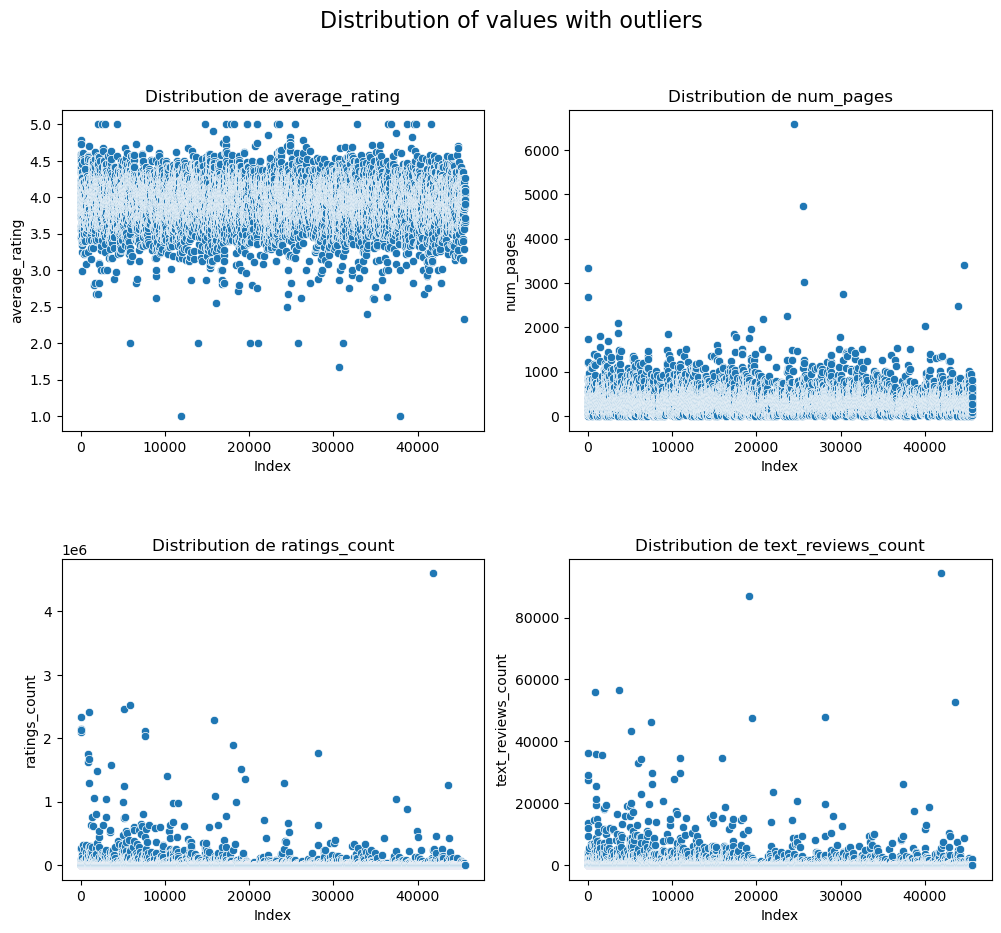

In [24]:
# Create a grid with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Adjust the spacing between graphics
plt.subplots_adjust(hspace=0.4)
# Display scatter plots for each column before processing
for i, column in enumerate(columns_to_process):
    row = i // 2  
    col = i % 2   
    sns.scatterplot(data=df_comparison, x=df_comparison.index, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {column}')
    axes[row, col].set_xlabel('Index')
    axes[row, col].set_ylabel(column)
plt.suptitle('Distribution of values with outliers', fontsize=16)
plt.show()

In [25]:
median_values = df[columns_to_process].median()
print("Calculated median  :\n", median_values)

Calculated median  :
 average_rating          3.96
num_pages             299.00
ratings_count         745.75
text_reviews_count     47.00
dtype: float64


In [26]:
# Replace outliers with the median
df[columns_to_process] = df[columns_to_process].apply(lambda x: x.mask(outliers_indices, x.median()))

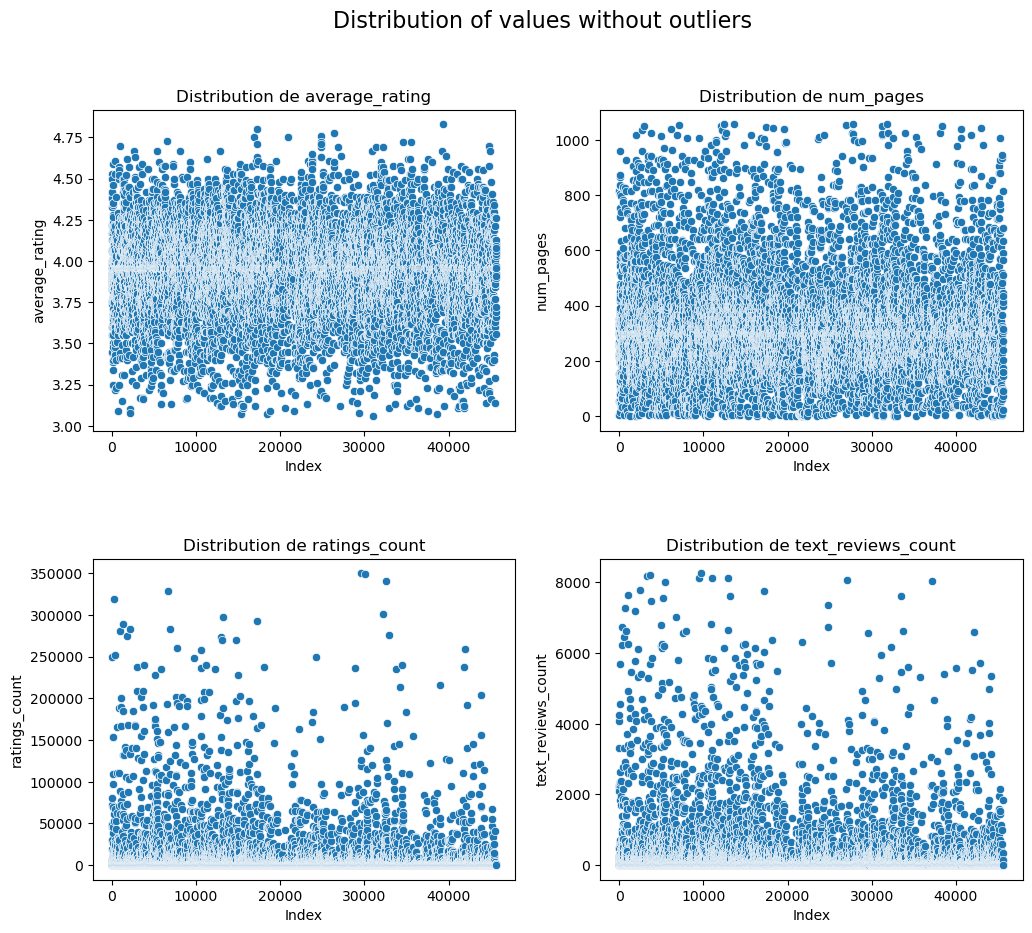

In [27]:
# Create a grid with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Adjust the spacing between graphics
plt.subplots_adjust(hspace=0.4)
# Display scatter plots for each column after processing
for i, column in enumerate(columns_to_process):
    row = i // 2  
    col = i % 2   
    sns.scatterplot(data=df, x=df.index, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {column}')
    axes[row, col].set_xlabel('Index')
    axes[row, col].set_ylabel(column)
plt.suptitle('Distribution of values without outliers', fontsize=16)
plt.show()

In [28]:
# export cleaned dataset for further analysis
df.to_excel(r'data/cleaned_books.xlsx', index=True, header=True)

###  Preparing Data for Clustering

In [29]:
# Extract the year from the publication_date column
df['publication_year'] = df['publication_date'].dt.year

In [30]:
# columns to remove
columns_to_remove = [ 'title', 'authors', 'isbn', 'isbn13', 'language_code', 'publisher', 'publication_date']

In [31]:
# remove columns
df_cluster = df.drop(columns=columns_to_remove, axis=1)

In [32]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11122 entries, 1 to 45641
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      11122 non-null  float64
 1   num_pages           11122 non-null  int64  
 2   ratings_count       11122 non-null  float64
 3   text_reviews_count  11122 non-null  int64  
 4   publication_year    11122 non-null  int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 477.9 KB


In [33]:
# export numerical dataset for further analysis
df_cluster.to_excel('data/numerical_books.xlsx', index=True, header=True)

# Clustering

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance

## Clustering Preprocessing - Normalization
> First thing to do in clustering is to normalize data. We used `MinMaxScaler` to do this.

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

## K-Means
> Parameters: * **K**: the number of clusters.
> We exploited the Elbow method to find the best value for `K`, calculating the mean of SSE for each value from 1 to 10 clusters.

C:\Users\RHADJI\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RHADJI\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RHADJI\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RHADJI\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

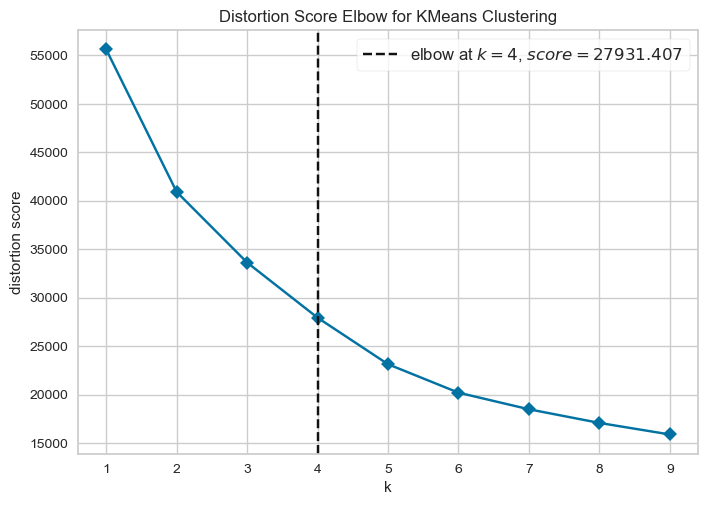

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
km = KMeans()
visualizer = KElbowVisualizer(
    km, k=(1,10), metric='distortion', timings=False)
visualizer.fit(X_scaled)
visualizer.show()

In [37]:
# Recovering the elbow point 
n_clusters = visualizer.elbow_value_
# Initialise a new KMeans object with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=20, max_iter=100)
# train the model with the optimum number of clusters.
kmeans.fit(X_scaled)
# examine the distribution of points in each cluster
hist, bins = np.histogram(kmeans.labels_,
                          bins=range(0, len(set(kmeans.labels_)) + 1))

In [38]:
# The size of the retrieved clusters.
dict(zip(bins, hist))

{0: 6841, 1: 461, 2: 1294, 3: 2526}

In [39]:
df_KM = df_cluster.copy()

In [40]:
# Predict the clusters to which each data point in the dataset (X_scaled) belongs
cluster = kmeans.predict(X_scaled)
# label each line with the cluster number predicted by the KMeans model for the corresponding data point
df_KM["cluster"] = cluster

In [41]:
df_clusters = df_KM.groupby(['cluster']).median().round(0)
df_clusters

average_rating  num_pages  ratings_count  text_reviews_count  \
cluster                                                                 
0                   4.0      252.0          731.0                47.0   
1                   4.0      340.0        91695.0              3180.0   
2                   4.0      272.0          392.0                37.0   
3                   4.0      512.0         1122.0                63.0   

         publication_year  
cluster                    
0                  2004.0  
1                  2003.0  
2                  1987.0  
3                  2003.0

In [42]:
# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

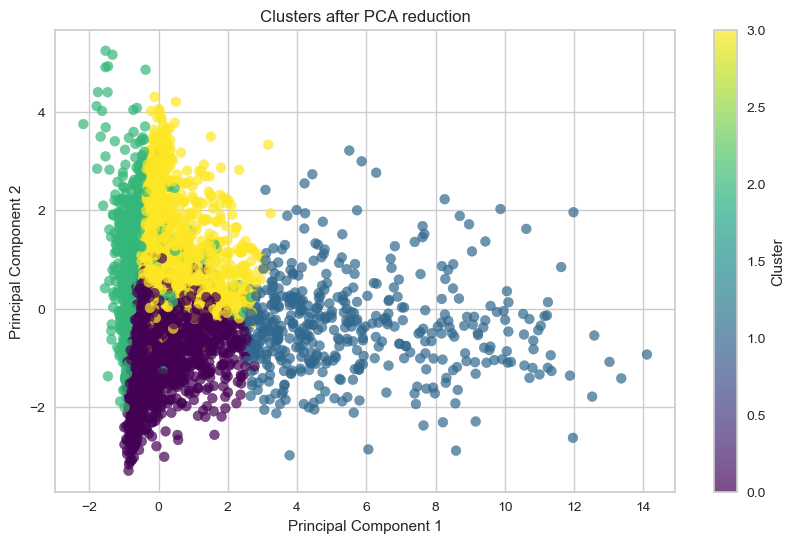

In [43]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_KM['cluster'], cmap='viridis', marker='o', alpha=0.7, s=50)
plt.title('Clusters after PCA reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [44]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

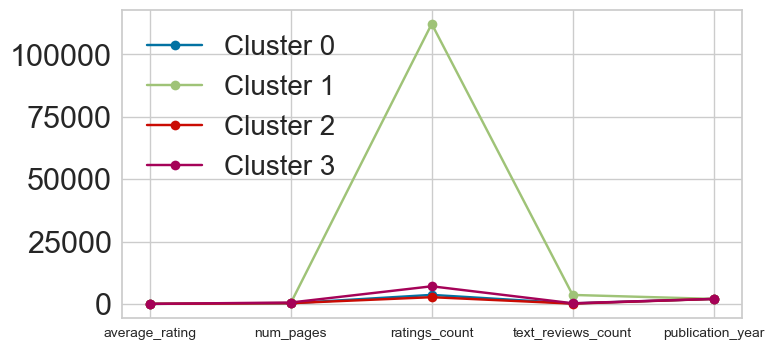

In [45]:
# Each cluster is represented by a line with circles indicating the centre values for each column.
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_cluster.columns)), df_cluster.columns, fontsize=10)
plt.legend(fontsize=20)
plt.show()

## DBSCAN

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

`min_samples` was set to twice the dimension of our dataset.


In [46]:
# the minimum number of neighbours required for a point to be considered a "core point" in the DBSCAN algorithm
min_pts = df_cluster.shape[1] * 2

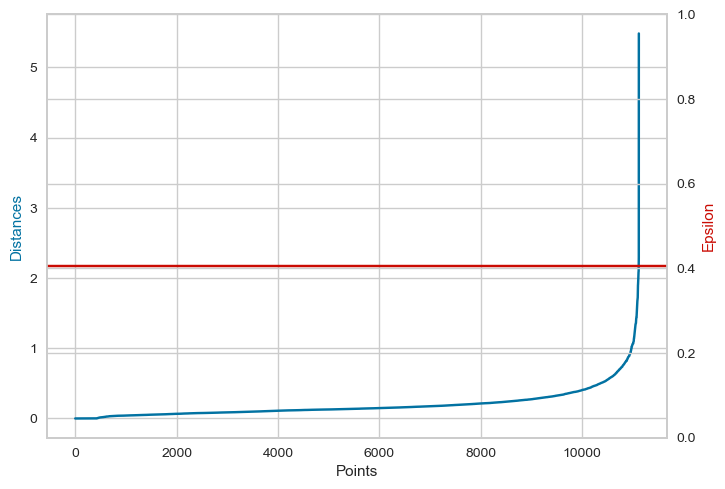

In [47]:
# Find the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
# Sort distances and extract the second column
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
# Calculate epsilon based on the percentile
percentile_value = np.percentile(distances, 90)
eps = percentile_value
# Create the figure with two y-axes
fig, ax1 = plt.subplots()
# Plot distances on the first y-axis
ax1.plot(distances, label='Distances', color='b')
ax1.set_xlabel('Points')
ax1.set_ylabel('Distances', color='b')
# Create the second y-axis for the epsilon line
ax2 = ax1.twinx()
ax2.axhline(y=eps, color='r', linestyle='-', label="eps")
ax2.set_ylabel('Epsilon', color='r')
# Show the figure
plt.show()

In [48]:
# Define the DBSCAN model with the appropriate parameters
dbscan = DBSCAN(eps=eps, min_samples=min_pts)
# Adapting the model to the data
dbscan.fit(X_scaled)

DBSCAN(eps=0.4066031256464157, min_samples=10)

In [49]:
# extract the cluster labels assigned by the DBSCAN algorithm and count the number of points in each cluster.
labels, counts = np.unique(dbscan.labels_, return_counts=True)
print(labels, counts)

[-1  0  1  2  3] [2267 8820   18    7   10]


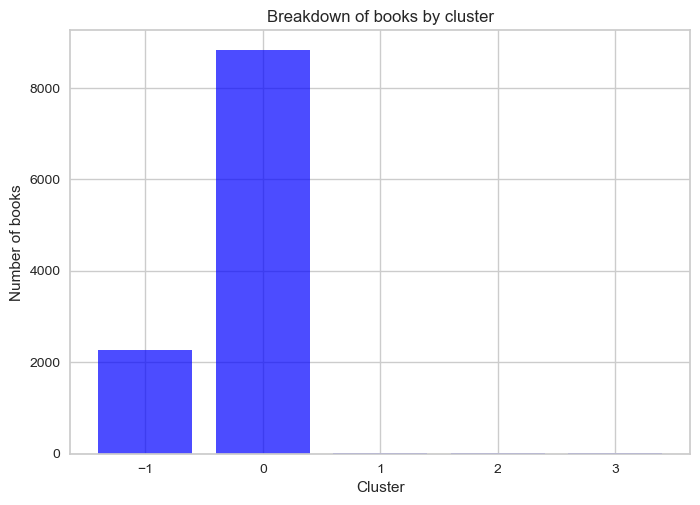

In [50]:
plt.bar(labels, counts, color='blue', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Number of books')
plt.title('Breakdown of books by cluster')
plt.show()

In [51]:
df_DB = df_cluster.copy()

In [52]:
# Adding cluster labels to the DataFrame
df_DB['cluster'] = dbscan.labels_

In [54]:
df_clusters = df_DB.groupby(['cluster']).median().round(0)
df_clusters 

average_rating  num_pages  ratings_count  text_reviews_count  \
cluster                                                                 
-1                  4.0      352.0        18874.0               711.0   
 0                  4.0      294.0          552.0                47.0   
 1                  4.0      160.0           76.0                21.0   
 2                  4.0      186.0          337.0                30.0   
 3                  4.0      230.0           82.0                22.0   

         publication_year  
cluster                    
-1                 2002.0  
 0                 2003.0  
 1                 1976.0  
 2                 1974.0  
 3                 1976.0

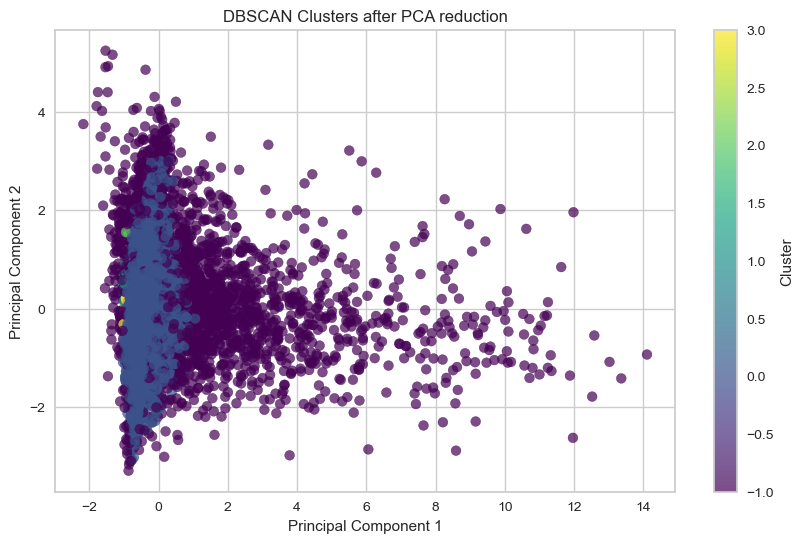

In [55]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_DB['cluster'], cmap='viridis', marker='o', alpha=0.7, s=50)
plt.title('DBSCAN Clusters after PCA reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [56]:
# Extract points for each cluster
cluster_0 = df_DB[df_DB['cluster'] == 0]
cluster__1 = df_DB[df_DB['cluster'] == -1]
cluster_1 = df_DB[df_DB['cluster'] == 1]
cluster_2 = df_DB[df_DB['cluster'] == 2]
cluster_3 = df_DB[df_DB['cluster'] == 3]

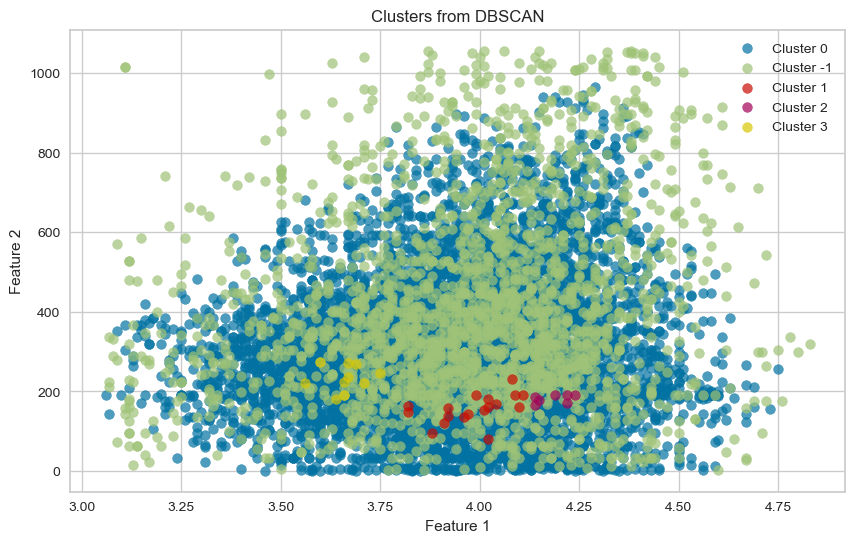

In [57]:
# Plot of points for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 1], label='Cluster 0', s=50, alpha=0.7)
plt.scatter(cluster__1.iloc[:, 0], cluster__1.iloc[:, 1], label='Cluster -1', s=50, alpha=0.7)
plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 1], label='Cluster 1', s=50, alpha=0.7)
plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 1], label='Cluster 2', s=50, alpha=0.7)
plt.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 1], label='Cluster 3', s=50, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters from DBSCAN')
plt.legend()
plt.show()

## Hierarchical Clustering

In [58]:
# implement a hierarchical function to perform hierarchical clustering
def hierarchical(method, metric):
    # Compute the pairwise distance matrix
    data_dist = pdist(X_scaled, metric=metric)
    # Perform agglomerative hierarchical clustering
    data_link = linkage(data_dist, method=method, metric=metric)
    # Plot the resulting dendrogram
    dendrogram(data_link, truncate_mode='lastp')
    # Set a threshold to cut the dendrogram
    max_d = 0.7 * max(data_link[:, 2])
    # Assign clusters based on the distance threshold
    app = fcluster(data_link, max_d, criterion='distance')
    # Calculate the centroid of each cluster
    cluster_centroids = np.array([X_scaled[app == cluster].mean(axis=0) for cluster in np.unique(app)])
    # Calculate the global centroid
    global_centroid = X_scaled.mean(axis=0)
    # Calculate WSS (Within-Cluster Sum of Squares)
    wss = np.sum([np.sum((X_scaled[app == cluster] - cluster_centroids[i])**2) for i, cluster in enumerate(np.unique(app))])
    # Calculate BSS (Between-Cluster Sum of Squares)
    bss = np.sum([np.sum((cluster_centroids[i] - global_centroid)**2) * np.sum(app == cluster) for i, cluster in enumerate(np.unique(app))])
    # Print the resulting clusters with the number of points in each cluster
    print(np.unique(app, return_counts=True))
    # Print WSS and BSS
    print("WSS:", wss)
    print("BSS:", bss)


> **Method: "single** : Use the single link method for hierarchical clustering. The distance between two clusters is defined as the minimum distance between any two points in the two clusters.

> **Metric: "cosine** : Use the cosine distance to measure dissimilarity between points. 

(array([1, 2], dtype=int32), array([11121,     1], dtype=int64))
WSS: 55609.90061188351
BSS: 0.09938811648543897


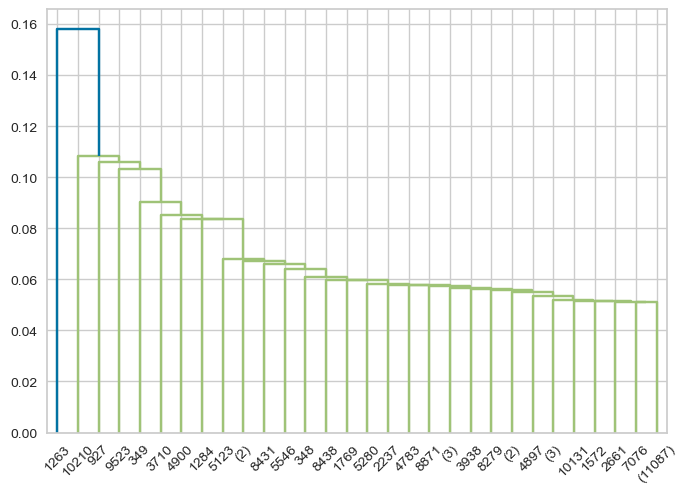

In [59]:
hierarchical(method='single', metric='cosine')

> **Method: "complete** : use the full link method for hierarchical clustering.  The distance between two clusters is defined as the maximum distance between any two points in the two clusters. This method is also known as the nearest neighbour method.

> **Metric: "Euclidean** : Use the Euclidean distance to measure dissimilarity between points. The Euclidean distance is the straight-line distance between two points in Euclidean space. It is calculated as the square root of the sum of the squares of the differences between the corresponding elements of the two vectors.

(array([1, 2, 3], dtype=int32), array([  184,    13, 10925], dtype=int64))
WSS: 42252.15377674104
BSS: 13357.846223258957


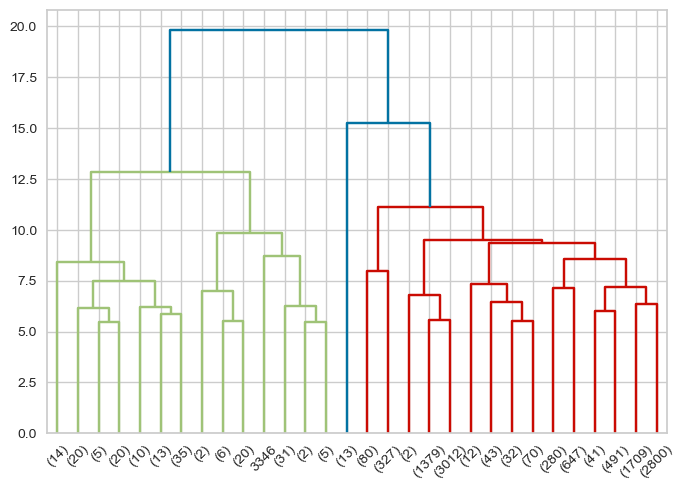

In [60]:
hierarchical(method='complete', metric='euclidean')

> **Method: 'average'** : Use the average link method for hierarchical clustering. The distance between two clusters is defined as the average distance between all pairs of points, one for each cluster.

> **Metric: 'cityblock'** : Use the cityblock distance metric (Manhattan) to measure dissimilarity between points. The cityblock distance is the sum of the absolute differences between the coordinates of the corresponding elements in the two vectors. It is also known as the Manhattan distance.

(array([1, 2, 3, 4], dtype=int32), array([    4,   324,    13, 10781], dtype=int64))
WSS: 40096.94350052835
BSS: 15513.056499471631


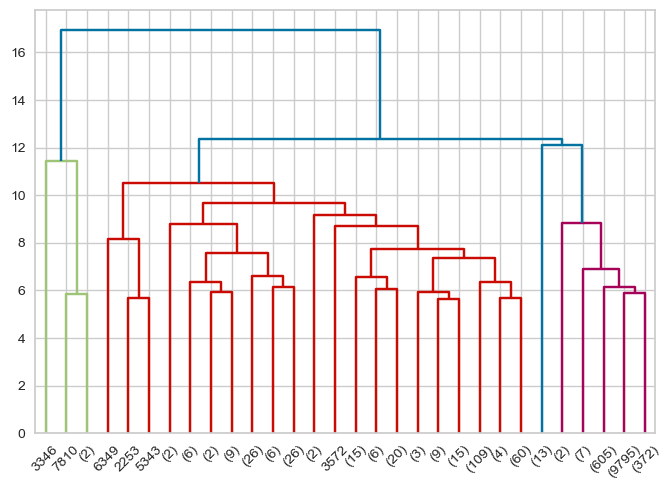

In [61]:
hierarchical(method='average', metric='cityblock')

> **Method: "ward** : Use Ward's link method for hierarchical clustering. This method minimises the variance within each cluster and is often used to produce compact clusters of homogeneous size.

> **Metric: "cosine** : Use the cosine distance to measure dissimilarity between points. 

(array([1, 2, 3, 4, 5], dtype=int32), array([1428, 2308, 4043, 1840, 1503], dtype=int64))
WSS: 29868.397671244184
BSS: 25741.60232875586


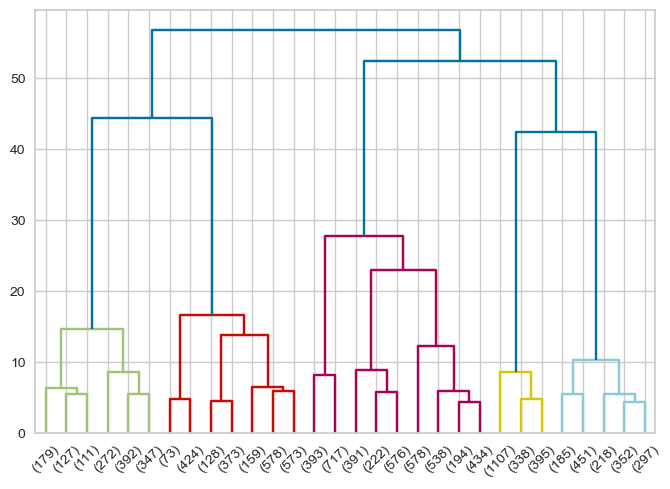

In [62]:
hierarchical(method='ward', metric='cosine')

### Agglomerative Clustering Algorithm

In [63]:
# Create an instance of the clustering algorithm
clustering = AgglomerativeClustering(n_clusters=5)

In [64]:
# Clustering standardised data
clusters = clustering.fit_predict(X_scaled)

In [65]:
df_AG = df_cluster.copy()

In [66]:
# Add cluster information to the DataFrame
df_AG['cluster'] = clusters

In [67]:
df_clusters = df_AG.groupby(['cluster']).median().round(0)
df_clusters 

average_rating  num_pages  ratings_count  text_reviews_count  \
cluster                                                                 
0                   4.0      335.0        76332.0              2709.0   
1                   4.0      272.0          746.0                47.0   
2                   4.0      272.0          406.0                35.0   
3                   4.0      555.0          874.0                49.0   
4                   4.0      224.0          758.0                47.0   

         publication_year  
cluster                    
0                  2004.0  
1                  2003.0  
2                  1988.0  
3                  2002.0  
4                  2004.0

In [68]:
df_AG.head()

average_rating  num_pages  ratings_count  text_reviews_count  \
bookID                                                                 
1                 3.96        299         745.75                  47   
2                 3.96        299         745.75                  47   
4                 4.42        352        6333.00                 244   
5                 3.96        299         745.75                  47   
8                 3.96        299         745.75                  47   

        publication_year  cluster  
bookID                             
1                   2006        1  
2                   2004        1  
4                   2003        4  
5                   2004        1  
8                   2004        1

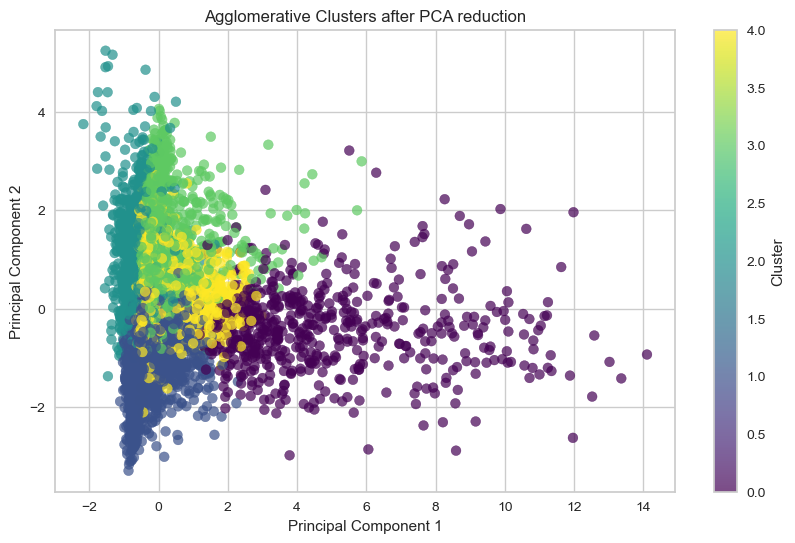

In [69]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_AG['cluster'], cmap='viridis', marker='o', alpha=0.7, s=50)
plt.title('Agglomerative Clusters after PCA reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [243]:
df_clusters = df_AG.groupby(['cluster']).mean().round(0)
df_clusters

average_rating  num_pages  ratings_count  text_reviews_count  \
cluster                                                                 
0                   4.0      342.0        97945.0              3227.0   
1                   4.0      252.0         2654.0               148.0   
2                   4.0      290.0         2157.0                91.0   
3                   4.0      590.0         5353.0               201.0   
4                   4.0      242.0         6876.0               238.0   

         publication_year  
cluster                    
0                  2002.0  
1                  2002.0  
2                  1985.0  
3                  2001.0  
4                  2004.0

# Evaluation and Comparaison 

## Silhouette Coefficient

In [244]:
kmeans_score = silhouette_score(X_scaled, df_KM['cluster'])

In [245]:
dbscan_score = silhouette_score(X_scaled, df_DB['cluster'])

In [246]:
agglomerative_score = silhouette_score(X_scaled, df_AG['cluster'])

In [247]:
print("K-means Silhouette Score:", kmeans_score)
print("DBSCAN Clustering Silhouette Score:", dbscan_score)
print("Agglomerative Clustering Silhouette Score:", agglomerative_score)

K-means Silhouette Score: 0.2649399988474363
DBSCAN Clustering Silhouette Score: 0.25328981520592725
Agglomerative Clustering Silhouette Score: 0.21913315230459293


## Cohesion and Separation

In [248]:
cluster_labels_K = kmeans.labels_
cluster_centers_K = kmeans.cluster_centers_

In [249]:
cluster_labels_D = dbscan.labels_
cluster_centers_D = []
for label in np.unique(dbscan.labels_):
    cluster_centers_D.append(np.mean(X_scaled[dbscan.labels_ == label], axis=0))

In [250]:
cluster_labels_A = clusters
cluster_centers_A = []
for label in np.unique(cluster_labels_A):
    cluster_centers_A.append(np.mean(X_scaled[cluster_labels_A == label], axis=0))

###  Calculate the Cohesion (WSS)

In [251]:
wss_K = np.sum([np.sum(np.square(X_scaled[cluster_labels_K == label] - cluster_centers_K[label])) 
              for label in np.unique(cluster_labels_K)])
wss_D = np.sum([np.sum(np.square(X_scaled[cluster_labels_D == label] - cluster_centers_D[label])) 
              for label in np.unique(cluster_labels_D)])
wss_A = np.sum([np.sum(np.square(X_scaled[cluster_labels_A == label] - cluster_centers_A[label])) 
              for label in np.unique(cluster_labels_A)])

In [252]:
print(f"K-Means : Cohesion (WSS): {wss_K}")
print(f"DBSCAN : Cohesion (WSS): {wss_D}")
print(f"Agglomerative : Cohesion (WSS): {wss_A}")

K-Means : Cohesion (WSS): 27922.937479113545
DBSCAN : Cohesion (WSS): 110478.75362606013
Agglomerative : Cohesion (WSS): 25941.4196961989


### Calculate the separation (BSS)

In [253]:
m = np.mean(X_scaled, axis=0)

In [254]:
bss_K = np.sum([len(cluster_labels_K[cluster_labels_K == label]) * np.sum(np.square(cluster_centers_K[label] - m)) 
              for label in np.unique(cluster_labels_K)])
bss_D = np.sum([len(cluster_labels_D[cluster_labels_D == label]) * np.sum(np.square(cluster_centers_D[label] - m)) 
              for label in np.unique(cluster_labels_D)])
bss_A = np.sum([len(cluster_labels_A[cluster_labels_A == label]) * np.sum(np.square(cluster_centers_A[label] - m)) 
              for label in np.unique(cluster_labels_A)])

In [255]:
print(f"K-Means : Separation (BSS): {bss_K}")
print(f"DBSCAN : Separation (BSS): {bss_D}")
print(f"Agglomerative : Separation (BSS): {bss_A}")

K-Means : Separation (BSS): 27678.691492463113
DBSCAN : Separation (BSS): 44308.01700879678
Agglomerative : Separation (BSS): 29668.58030380111
